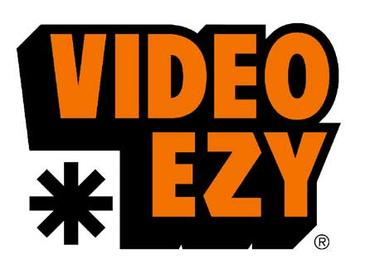

# **Tortoise-TTS, RVC, Wav2Lip, MusicGen + AutoEdit, Lipdub and Insane YouTube Downloader**

Install all Required tools by pressing play buttons

**Install Tortoise**

In [1]:
!pip install moviepy
%cd /content
!git clone -b dev https://github.com/camenduru/tortoise-hf
%cd /content/tortoise-hf
!git clone -b v1.0 https://github.com/camenduru/tortoise-tts

!pip install gradio scipy -U
%cd /content/tortoise-hf/tortoise-tts
!pip install transformers==4.19.0
!pip install -r requirements.txt
!python setup.py install

%cd /content/tortoise-hf

/content
Cloning into 'tortoise-hf'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 117 (delta 64), reused 109 (delta 60), pack-reused 0
Receiving objects: 100% (117/117), 17.93 KiB | 8.96 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/tortoise-hf
Cloning into 'tortoise-tts'...
remote: Enumerating objects: 1531, done.
remote: Total 1531 (delta 0), reused 0 (delta 0), pack-reused 1531
Receiving objects: 100% (1531/1531), 53.58 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (627/627), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
%cd /content/

/content


**Install RVC-Pipeline**

In [3]:
!pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121
!pip install pyttsx3
!pip install sounddevice
!pip install soundfile
!sudo apt-get update
!sudo apt-get install aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/hubert_base.pt -d /content/ -o hubert_base.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/rmvpe.pt -d /content/ -o rmvpe.pt
!pip install -e git+https://github.com/JarodMica/rvc.git#egg=rvc
!pip install -e git+https://github.com/JarodMica/rvc-tts-pipeline.git#egg=rvc_tts_pipe
import sys
sys.path.append('/content/src/rvc')
sys.path.append('/content/src/rvc-tts-pipe')


Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,264 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restrict

Test Install

In [4]:
from rvc_infer import rvc_convert

Write the test.py

In [5]:
%%writefile test.py

import argparse
import os
import time
import shutil  # Added this import for copying files
from rvc_infer import rvc_convert  # Assuming the rvc_infer module is available

def copy_output_file(src, dest):
    try:
        shutil.copy(src, dest)
        print(f"File copied from {src} to {dest}")
    except Exception as e:
        print(f"An error occurred while copying: {e}")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_path", required=True)
    parser.add_argument("--file_index", required=True)
    parser.add_argument("--f0_up_key", required=True)
    parser.add_argument("--input_path", required=True)
    parser.add_argument("--out", required=True)
    args = parser.parse_args()

    # Call rvc_convert function
    rvc_convert(model_path=args.model_path, file_index=args.file_index, f0_up_key=int(args.f0_up_key), input_path=args.input_path)

    # Wait for 3 seconds to ensure the output file is ready
    time.sleep(0.25)

    # Copy file
    default_output_path = "/content/output/out.wav"
    copy_output_file(default_output_path, args.out)


Writing test.py


In [6]:
%cd /content/

/content


**Install Wav2Lip**

In [7]:
!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U

# Navigate to /content/ directory
%cd /content/

!git clone https://huggingface.co/camenduru/Wav2Lip
!pip install gradio yt_dlp ffmpeg-python librosa==0.8.0

# Change directory to Wav2Lip
%cd Wav2Lip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.6 MB/s eta 0:00:00
/content
Cloning into 'Wav2Lip'...
remote: Enumerating objects: 69, done.
remote: Total 69 (delta 0), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (69/69), 441.37 KiB | 2.07 MiB/s, done.
Filtering content: 100% (5/5), 851.20 MiB | 182.01 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 

/content/Wav2Lip


In [8]:
%cd /content/

/content


**Install LipDub, AutoEdit, DownTown and CombineVid scripts**

In [9]:
%%writefile lipdub.py

from pydub import AudioSegment
from pydub.silence import detect_silence, detect_nonsilent
from moviepy.editor import VideoFileClip, concatenate_videoclips, AudioFileClip
from moviepy.video import fx
import argparse

def main(input_audio, input_clip, output_path):
    audio = AudioSegment.from_file(input_audio, format="wav")
    audio_duration = len(audio) / 1000.0  # Convert from milliseconds to seconds

    silent_ranges = detect_silence(audio, silence_thresh=-50, min_silence_len=500)
    nonsilent_ranges = detect_nonsilent(audio, silence_thresh=-50, min_silence_len=500)

    timestamps = []

    for start, end in nonsilent_ranges:
        timestamps.append((start, end, 'audible'))

    for start, end in silent_ranges:
        timestamps.append((start, end, 'silent'))

    timestamps.sort(key=lambda x: x[0])

    clips = []
    bart = VideoFileClip(f"/content/vids/{input_clip}.mp4").resize(height=720)
    bart2 = VideoFileClip(f"/content/vids/{input_clip}2.mp4").resize(height=720)

    bart = bart.set_fps(30).fx(fx.all.loop, duration=audio_duration)  # Loop to match audio duration
    bart2 = bart2.set_fps(30).fx(fx.all.loop, duration=audio_duration)  # Loop to match audio duration

    audio_clip = AudioFileClip(input_audio)

    for start, end, label in timestamps:
        duration = (end - start) / 1000.0
        if label == 'audible':
            clip = bart.subclip(0, duration)
        else:
            clip = bart2.subclip(0, duration)
        clips.append(clip)

    final_video = concatenate_videoclips(clips)
    final_video = final_video.set_audio(audio_clip)
    final_video.write_videofile(output_path, codec="libx264")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--input_audio", required=True)
    parser.add_argument("--input_clip", required=True)
    parser.add_argument("--output", required=True)
    args = parser.parse_args()
    main(args.input_audio, args.input_clip, args.output)


Writing lipdub.py


In [10]:
%%writefile autoedit.py
import os
import argparse
import ast
import shutil
from yt_dlp import YoutubeDL
import cv2
import numpy as np


timestamps = []

def download_segment(name, video_file_path, start, end, count, start_offset_ms, end_offset_ms):
    print(f"Processing segment {count} for {name} from {start} to {end}")

    # Load the video using OpenCV
    cap = cv2.VideoCapture(video_file_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    out = cv2.VideoWriter(f'/content/vids/{name}_{count}.mp4', fourcc, fps, (frame_width, frame_height))

    start_frame = int((fps * int(start.split(':')[2]) + fps * 60 * int(start.split(':')[1]) + fps * 3600 * int(start.split(':')[0])) + (start_offset_ms / 1000 * fps))
    end_frame = int((fps * int(end.split(':')[2]) + fps * 60 * int(end.split(':')[1]) + fps * 3600 * int(end.split(':')[0])) - (end_offset_ms / 1000 * fps))

    current_frame = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if current_frame >= start_frame:
            if current_frame <= end_frame:
                out.write(frame)
            else:
                break
        current_frame += 1

    cap.release()
    out.release()

def main():
    parser = argparse.ArgumentParser(description='Auto-edit video based on provided parameters.')
    parser.add_argument('params', type=str, nargs='+', help='List of parameters for video processing.')
    args = parser.parse_args()

    # Parse the arguments and add them to the timestamps list
    params_tuple = ast.literal_eval(" ".join(args.params))
    timestamps.append(params_tuple)

if __name__ == "__main__":
    main()
# Create directories if they don't exist
if not os.path.exists('/content/vids'):
    os.makedirs('/content/vids')


def scroll_video(name, count, scroll_up_increment, scroll_right_increment):
    cap = cv2.VideoCapture(f'/content/vids/{name}_{count}_rotating.mp4')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'/content/vids/{name}_{count}_scrolling.mp4', fourcc, fps, (frame_width, frame_height))

    scroll_up_value = 0
    scroll_right_value = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Scroll Up and Right
        scrolled_frame = np.roll(frame, (scroll_up_value, scroll_right_value), axis=(0, 1))
        out.write(scrolled_frame)

        scroll_up_value += scroll_up_increment
        scroll_right_value += scroll_right_increment

    cap.release()
    out.release()

def process_video(name, is_reversed, add_reverse, repeat_count, count, new_dimensions, zoom, playback_rate, zoom_increment, scroll_up_increment, scroll_right_increment):
    new_frame_width, new_frame_height = map(int, new_dimensions.split(","))
    cap = cv2.VideoCapture(f'/content/vids/{name}_{count}.mp4')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'/content/vids/{name}_{count}_rotating.mp4', fourcc, fps * playback_rate, (new_frame_width, new_frame_height))

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    if is_reversed == "R":
        frames = frames[::-1]

    if add_reverse == "R":
        frames += frames[::-1]

    zoom_value = zoom
    combined_frames = frames * repeat_count

    scroll_up_value = 0
    scroll_right_value = 0

    for i, frame in enumerate(combined_frames):
        canvas = np.zeros((new_frame_height, new_frame_width, 3), dtype=np.uint8)
        new_height = int(frame.shape[0] * (zoom_value / 100))
        new_width = int(frame.shape[1] * (zoom_value / 100))
        resized_frame = cv2.resize(frame, (new_width, new_height))

        x_offset = max((new_frame_width - new_width) // 2, 0)
        y_offset = max((new_frame_height - new_height) // 2, 0)

        if new_height > new_frame_height or new_width > new_frame_width:
            crop_y1 = max(0, -y_offset)
            crop_y2 = min(new_height, new_frame_height - y_offset)
            crop_x1 = max(0, -x_offset)
            crop_x2 = min(new_width, new_frame_width - x_offset)
            resized_frame = resized_frame[crop_y1:crop_y2, crop_x1:crop_x2]

        canvas[y_offset:y_offset + resized_frame.shape[0], x_offset:x_offset + resized_frame.shape[1]] = resized_frame

        # Apply scrolling
        scrolled_frame = np.roll(canvas, (scroll_up_value, scroll_right_value), axis=(0, 1))

        out.write(scrolled_frame)  # Save the scrolled frame

        # Increment scrolling value for the next frame
        scroll_up_value += scroll_up_increment
        scroll_right_value += scroll_right_increment

        # Update zoom value for the next frame
        zoom_value += zoom_increment

    cap.release()
    out.release()

def shift_frames(name, count, shift_x, shift_y, rotation_angle):
    cap = cv2.VideoCapture(f'/content/vids/{name}_{count}.mp4')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'/content/vids/{name}_{count}_temp.mp4', fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Shift frame
        shifted_frame = np.roll(frame, (shift_y, shift_x), axis=(0, 1))

        # Rotate frame
        M = cv2.getRotationMatrix2D((frame_width // 2, frame_height // 2), rotation_angle, 1)
        rotated_shifted_frame = cv2.warpAffine(shifted_frame, M, (frame_width, frame_height))

        out.write(rotated_shifted_frame)

    cap.release()
    out.release()

    # Overwrite the original file with the shifted and rotated video
    os.remove(f'/content/vids/{name}_{count}.mp4')
    os.rename(f'/content/vids/{name}_{count}_temp.mp4', f'/content/vids/{name}_{count}.mp4')

for new_dimensions, name, youtube_link, time_data in timestamps:
    for count, (start_time, end_time, is_reversed, add_reverse, repeat_count, zoom, playback_rate, shift_x, shift_y, rotation_angle, zoom_increment, rotation_increment_value, scroll_up_increment, scroll_right_increment, start_offset_ms, end_offset_ms) in enumerate(time_data):
        download_segment(name, youtube_link, start_time, end_time, count, start_offset_ms, end_offset_ms)
        rotation_increment = rotation_increment_value
        shift_frames(name, count, shift_x, shift_y, rotation_angle)
        process_video(name, is_reversed, add_reverse, repeat_count, count, new_dimensions, zoom, playback_rate, zoom_increment, scroll_up_increment, scroll_right_increment)
        scroll_video(name, count, scroll_up_increment, scroll_right_increment)  # Call new scroll function here

# Clean up temporary files
for count in range(len(time_data)):
    os.remove(f'/content/vids/{name}_{count}.mp4')

# Input video file path
input_video_path = (f'/content/vids/{name}_0_rotating.mp4')

# Output video file path
output_video_path = (f'/content/vids/{name}.mp4')

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the VideoWriter object to save the output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))


# Process each frame and save the rotated video
for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    # Rotate the frame
    rotated_frame = cv2.warpAffine(frame, cv2.getRotationMatrix2D((frame_width / 2, frame_height / 2), i * rotation_increment, 1), (frame_width, frame_height))

    # Write the rotated frame to the output video
    # Write the rotated frame to the output video
    out.write(rotated_frame)

# Release video objects
cap.release()
out.release()

# Display a message when the process is complete
print(f"Video saved as {output_video_path}")

# Clean up temporary files
for count in range(len(time_data)):
    os.remove(f'/content/vids/{name}_{count}_rotating.mp4')

# Close all OpenCV windows
cv2.destroyAllWindows()

# Clean up temporary scrolling files
for count in range(len(time_data)):
    os.remove(f'/content/vids/{name}_{count}_scrolling.mp4')


Writing autoedit.py


In [11]:
%%writefile DownTown.py
import os
import argparse
from yt_dlp import YoutubeDL
from moviepy.editor import VideoFileClip, concatenate_videoclips

# Create directories if they don't exist
if not os.path.exists('/content/vids'):
    os.makedirs('/content/vids')

if not os.path.exists('/content/#voicemp3'):
    os.makedirs('/content/#voicemp3')

# Function to download a video segment
def download_segment(start, end, index, video_url):
    ydl_opts = {
        'format': 'best',  # changed from '22' to 'best'
        'outtmpl': f'/content/vids/segment_{index}.mp4',
        'external_downloader': 'ffmpeg',
        'external_downloader_args': ['-ss', start, '-to', end]
    }

    with YoutubeDL(ydl_opts) as ydl:
        ydl.download([video_url])


# Command-line argument parsing
def main():
    parser = argparse.ArgumentParser(description="Download video segments, concatenate, and extract audio.")
    parser.add_argument("name", help="Name for the final video and audio files")
    parser.add_argument("video_url", help="URL of the YouTube video")
    parser.add_argument("timestamps", nargs="+", help="List of timestamps in the format 'start end'")
    parser.add_argument("-v", "--remove-video", action="store_true", help="Remove video file at the end")
    parser.add_argument("-a", "--remove-audio", action="store_true", help="Remove audio file at the end")
    parser.add_argument("-k", "--keep-both", action="store_true", help="Keep both audio and video files")

    args = parser.parse_args()
    name = args.name
    video_url = args.video_url
    timestamps = [tuple(timestamp.split()) for timestamp in args.timestamps]

    # Download each segment
    for i, (start_time, end_time) in enumerate(timestamps):
        download_segment(start_time, end_time, i, video_url)

    # Combine the segments
    segments = [VideoFileClip(f'/content/vids/segment_{i}.mp4') for i in range(len(timestamps))]
    final_clip = concatenate_videoclips(segments)
    final_clip.write_videofile(f"/content/vids/{name}.mp4")

    # Extract audio and save as MP3
    audio = final_clip.audio.set_fps(44100)
    audio.write_audiofile(f"/content/#voicemp3/{name}.mp3")

    # Clean up segment files
    for i in range(len(timestamps)):
        os.remove(f'/content/vids/segment_{i}.mp4')

    # Remove video and/or audio files if specified
    if args.remove_video and not args.keep_both:
        os.remove(f'/content/vids/{name}.mp4')
    if args.remove_audio and not args.keep_both:
        os.remove(f'/content/#voicemp3/{name}.mp3')

if __name__ == "__main__":
    main()


Writing DownTown.py


In [12]:
%%writefile combineVid.py
import argparse
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

# Create an argument parser
parser = argparse.ArgumentParser(description="Concatenate two video files while preserving properties of the first video.")
parser.add_argument("input1", help="Path to the first input video file.")
parser.add_argument("input2", help="Path to the second input video file.")
parser.add_argument("-y", action="store_true", help="Confirm to overwrite output file if it exists.")

# Parse the command-line arguments
args = parser.parse_args()

# Check if the '-y' flag is provided and set a variable for overwrite
overwrite = args.y

# Load the first video clip (input1) to extract its properties
clip1 = VideoFileClip(args.input1)

# Load the second video clip (input2)
clip2 = VideoFileClip(args.input2)

# Match the properties of clip2 to clip1
clip2 = clip2.set_duration(clip1.duration).set_fps(clip1.fps).set_audio(clip1.audio)

# Resize the second video (clip2) to match the resolution of the first video (clip1)
clip2 = clip2.resize((clip1.size[0], clip1.size[1]))

# Concatenate the video clips in the correct order
final_clip = concatenate_videoclips([clip1, clip2])

# Determine the output file name (default is "output.mp4")
output_filename = "output.mp4"

# Check if the output file already exists and if the '-y' flag is provided
if os.path.isfile(output_filename) and not overwrite:
    print("Output file already exists. Use '-y' flag to overwrite.")
else:
    # Remove the existing output file if it exists
    if os.path.isfile(output_filename):
        os.remove(output_filename)

    # Write the final result to a file with specified bitrate
    final_clip.write_videofile(output_filename, codec="libx264", preset="ultrafast", threads=4, bitrate="2000k")

    print(f"Concatenated video saved as {output_filename}")


Writing combineVid.py


**YouTube Voice Video Rip AutoEdit Example**

*   !python autoedit.py {resolution} {name} {video_path}  {{starttime-endtime} {N=normal play R =Reverse} {N=KeepNormal R=AddReverso} {RepeatCount} {InitialZoom} {InitialRotation} {PlayBackRate} {XShift} {YShift} {ZoomSpeed} {RotationSpeed} {XShiftSpeed} {YShiftSpeed}
*   !python DownTown {name} {YouTube_Link} {timestamp1} {timestamp2}.... {k means keep both video and audio, a means remove audio keep video, v means remove video keep audio}



In [13]:
!python DownTown.py "matt" "https://www.youtube.com/watch?v=BBCl9A9NlRw" "00:05:01 00:05:52" "00:24:33 00:25:00" -k

!python DownTown.py "Homer" "https://www.youtube.com/watch?v=NXegsaDctGE" "00:01:02 00:01:13" -a
!python DownTown.py "Homer2" "https://www.youtube.com/watch?v=NXegsaDctGE" "00:01:02 00:01:13" -a
!python autoedit.py "('1080,1920', 'Homer', '/content/vids/Homer.mp4', [('00:0:00', '00:00:10', 'N', 'R', 7, 250, 1.0, -250, 0, 0, 0.1, 0.1, 0, 0, 1000, 2000)])"
#!python DownTown.py "matt420" "https://www.youtube.com/watch?v=BBCl9A9NlRw" "00:24:33 00:25:00" -k
#!python combineVid.py "/content/vids/matt69.mp4" "/content/vids/matt420.mp4" -y

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**GRAB SOME RVC VOICES**

In [14]:
%%writefile RVC-dl.py
import requests
import zipfile
import io
import os
import sys
import re
import gdown

def resolve_hugging_face_url(zip_url):
    response = requests.head(zip_url, allow_redirects=True)
    if response.status_code == 200:
        return response.url
    else:
        return None

def extract_google_drive(file_id, target_directory):
    temp_zip_path = "/content/temp_google_drive.zip"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", temp_zip_path, quiet=False)

    with zipfile.ZipFile(temp_zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if not file_info.is_dir():  # Only extract files
                file_info.filename = os.path.basename(file_info.filename)
                zip_ref.extract(file_info, target_directory)

    os.remove(temp_zip_path)
    print("ZIP file downloaded and extracted successfully from Google Drive.")

def extract_zip(zip_url, target_directory):
    os.makedirs(target_directory, exist_ok=True)

    if "drive.google.com" in zip_url:
        file_id_search = re.search(r"/file/d/([a-zA-Z0-9_-]+)/", zip_url)
        if file_id_search:
            file_id = file_id_search.group(1)
            extract_google_drive(file_id, target_directory)
        else:
            print("Invalid Google Drive URL.")
        return

    if "huggingface.co" in zip_url:
        zip_url = resolve_hugging_face_url(zip_url)
        if zip_url is None:
            print("Failed to resolve Hugging Face URL.")
            return

    response = requests.get(zip_url)
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
            for file_info in zip_ref.infolist():
                if not file_info.is_dir():  # Only extract files
                    file_info.filename = os.path.basename(file_info.filename)
                    zip_ref.extract(file_info, target_directory)
        print("ZIP file downloaded and extracted successfully.")
    else:
        print("Failed to download ZIP file.")

if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Usage: python RVC-dl.py <target_directory> <zip_url>")
    else:
        target_directory = sys.argv[1]
        zip_url = sys.argv[2]
        extract_zip(zip_url, target_directory)


Writing RVC-dl.py


In [15]:
!pip install gdown

In [16]:
!python RVC-dl.py "/content/#voicervc/Bart/" "https://huggingface.co/Biotin/BartSimpson/resolve/main/BartSimpson.zip"
!python RVC-dl.py "/content/#voicervc/Homer/" "https://drive.google.com/file/d/1O6GOlcNJ8nBBppFXSZqdcBc3mOW3k4V8/view?usp=sharing"

ZIP file downloaded and extracted successfully.
Downloading...
From: https://drive.google.com/uc?id=1O6GOlcNJ8nBBppFXSZqdcBc3mOW3k4V8
To: /content/temp_google_drive.zip
100% 205M/205M [00:03<00:00, 63.0MB/s]
ZIP file downloaded and extracted successfully from Google Drive.


**Prepare all of /#voicemp3/ for tortoise-tts**

In [17]:
!pip install pydub
from pydub import AudioSegment
import os

# Iterate over all mp3 files in the source directory
for filename in os.listdir("/content/#voicemp3"):
    if filename.endswith(".mp3"):
        # Load the MP3 file
        audio_path = os.path.join("/content/#voicemp3", filename)
        audio = AudioSegment.from_mp3(audio_path)

        # Define the duration for each segment in milliseconds (10 seconds = 10000 milliseconds)
        duration_per_segment = 10000

        # Calculate the number of segments
        num_segments = len(audio) // duration_per_segment + (1 if len(audio) % duration_per_segment else 0)

        # Create a new directory for the split files, named after the mp3 file
        new_dir = os.path.join("/content/tortoise-hf/tortoise-tts/tortoise/voices", filename.rsplit(".", 1)[0])
        os.makedirs(new_dir, exist_ok=True)

        # Split the audio and save each segment
        for i in range(num_segments):
            start_time = i * duration_per_segment
            end_time = (i+1) * duration_per_segment
            segment = audio[start_time:end_time]
            segment.export(f"{new_dir}/{i+1}.wav", format="wav")
            print(f"Saved segment {i+1}.wav for {filename}")

print("All segments saved successfully!")


Saved segment 1.wav for matt.mp3
Saved segment 2.wav for matt.mp3
Saved segment 3.wav for matt.mp3
Saved segment 4.wav for matt.mp3
Saved segment 5.wav for matt.mp3
Saved segment 6.wav for matt.mp3
Saved segment 7.wav for matt.mp3
Saved segment 8.wav for matt.mp3
All segments saved successfully!


# **PIPELINES**

**Re-Initiate Tortoise-TTS/Install**

In [18]:
%cd /content/

/content


In [19]:
!pip install moviepy
%cd /content
!git clone -b dev https://github.com/camenduru/tortoise-hf
%cd /content/tortoise-hf
!git clone -b v1.0 https://github.com/camenduru/tortoise-tts

!pip install gradio scipy -U
%cd /content/tortoise-hf/tortoise-tts
!pip install transformers==4.19.0
!pip install -r requirements.txt
!python setup.py install

%cd /content/tortoise-hf

/content
fatal: destination path 'tortoise-hf' already exists and is not an empty directory.
/content/tortoise-hf
fatal: destination path 'tortoise-tts' already exists and is not an empty directory.
  Using cached gradio-3.45.1-py3-none-any.whl (20.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: gradio
    Found existing installation: gradio 3.14.0
    Uninstalling gradio-3.14.0:
      Successfully uninstalled gradio-3.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchcrepe 0.0.20 requires librosa==0.9.1, but you have librosa 0.8.0 which is incompatible.
rvc 0.1 requires gradio==3.14.0, but you have gradio 3.45.1 which is incompatible.
rvc 0.1 re

**Generate Voice With Tortoise-TTS**

In [20]:
%cd /content/tortoise-hf/

/content/tortoise-hf


In [21]:
!python3 /content/tortoise-hf/tortoise-tts/tortoise/do_tts.py --text "I was matt before i was paid to be matt!" --voice="matt" --preset high_quality --output="/content/out/"

Downloading: 100% 2.06k/2.06k [00:00<00:00, 9.35MB/s]
Downloading: 100% 1.18G/1.18G [00:27<00:00, 45.9MB/s]
Downloading: 100% 159/159 [00:00<00:00, 946kB/s]
Downloading: 100% 1.57k/1.57k [00:00<00:00, 10.2MB/s]
Downloading: 100% 181/181 [00:00<00:00, 954kB/s]
Downloading: 100% 85.0/85.0 [00:00<00:00, 488kB/s]
100% (1716988501 of 1716988501) |#########| Elapsed Time: 0:00:04 Time:  0:00:04
Done.
100% (1169472627 of 1169472627) |#########| Elapsed Time: 0:00:03 Time:  0:00:03
Done.
100% (975620731 of 975620731) |###########| Elapsed Time: 0:00:02 Time:  0:00:02
Done.
100% (391384715 of 391384715) |###########| Elapsed Time: 0:00:00 Time:  0:00:00
Done.
Generating autoregressive samples..
100% 16/16 [00:40<00:00,  2.52s/it]
Computing best candidates using CLVP
100% 16/16 [00:12<00:00,  1.24it/s]
Transforming autoregressive outputs into audio..
100% 400/400 [00:39<00:00, 10.14it/s]
100% 400/400 [00:37<00:00, 10.70it/s]
100% 400/400 [00:46<00:00,  8.60it/s]


**RVC Voice Conversion of the Tortoise-TTS Output**

In [22]:
%cd /content/

/content


In [23]:
!python "/content/test.py" --model_path="/content/#voicervc/Bart/BartSimpson_e230_s7360.pth" --file_index="/content/#voicervc/Bart/added_IVF1544_Flat_nprobe_1_BartSimpson_v2.index" --f0_up_key=0 --input_path="/content/out/matt_0_0.wav" --out="/content/output/worked.wav"


loading pth /content/#voicervc/Bart/BartSimpson_e230_s7360.pth
gin_channels: 256 self.spk_embed_dim: 109
<All keys matched successfully>
2023-09-27 16:48:06 | INFO | fairseq.tasks.hubert_pretraining | current directory is /content
2023-09-27 16:48:06 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': 'metadata', 'fine_tuning': False, 'labels': ['km'], 'label_dir': 'label', 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2023-09-27 16:48:06 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': gelu, 'layer_type': transformer, 'dropout': 0.1, 'attention_

**Wav2Lip the Tortoise-TTS output**

In [24]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [25]:
!python /content/Wav2Lip/inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/vids/matt.mp4" --audio "/content/out/matt_0_0.wav"

Using cuda for inference.
Reading video frames...
Number of frames available for inference: 2343
(80, 286)
Length of mel chunks: 103
  0% 0/1 [00:00<?, ?it/s]
  0% 0/7 [00:00<?, ?it/s]
 14% 1/7 [00:13<01:19, 13.24s/it]
 29% 2/7 [00:16<00:37,  7.44s/it]
 43% 3/7 [00:19<00:22,  5.56s/it]
 57% 4/7 [00:23<00:13,  4.65s/it]
 71% 5/7 [00:26<00:08,  4.14s/it]
 86% 6/7 [00:29<00:03,  3.84s/it]
100% 7/7 [00:34<00:00,  4.99s/it]
Load checkpoint from: checkpoints/wav2lip_gan.pth
Model loaded
100% 1/1 [00:40<00:00, 40.42s/it]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-li

**LipDub (Video1 is Audibles and Video2 is in-Audibles)**

In [26]:
!python /content/lipdub.py --input_audio="/content/output/worked.wav" --input_clip="matt" --output="/content/worked.mp4"

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**Generate BG Music**

In [27]:
%cd /content/

/content


In [28]:
%%writefile edit_params_script.py
import sys
import re

def edit_file(file_path, search_texts, replace_texts):
    with open(file_path, 'r') as file:
        file_contents = file.read()

    for search_text, replace_text in zip(search_texts, replace_texts):
        # Replace the search_text with replace_text
        new_contents = re.sub(search_text, replace_text, file_contents)
        file_contents = new_contents

    with open(file_path, 'w') as file:
        file.write(new_contents)

if __name__ == "__main__":
    if len(sys.argv) != 5:
        print("Usage: python EditParams.py <replace_text_1> <replace_number> <replace_duration> <replace_duration_2>")
        sys.exit(1)

    search_text_1 = re.escape("John Williams Gangsta Rap with Tabla Taiko low to mid range strong lead instruments")
    replace_text_1 = sys.argv[1]

    search_text_2 = re.escape("for i in range(3):")
    replace_text_2 = f"for i in range({sys.argv[2]}):"

    search_text_3 = re.escape("prompt_duration = 12")
    replace_text_3 = f"prompt_duration = {sys.argv[3]}"

    search_text_4 = re.escape("    duration=30")
    replace_text_4 = f"    duration={sys.argv[4]}"

    edit_file('/content/set_params_script.py', [search_text_1, search_text_2, search_text_3, search_text_4], [replace_text_1, replace_text_2, replace_text_3, replace_text_4])


Writing edit_params_script.py


In [29]:
%%writefile set_params_script.py

# Add the necessary imports
from audiocraft.models import MusicGen
from audiocraft.models import MultiBandDiffusion

# Initialization or loading the model (if needed)
model = MusicGen.get_pretrained('facebook/musicgen-large')

# The code block you want to run
model.set_generation_params(
    use_sampling=True,
    top_k=250,
    duration=30
)
import soundfile as sf  # Import the soundfile library
import numpy as np  # Import NumPy
import math
import torchaudio
import os

output = model.generate(
    descriptions=[
        'John Williams Gangsta Rap with Tabla Taiko low to mid range strong lead instruments',
    ],
    progress=True, return_tokens=True
)

# Move the tensor to CPU, convert to NumPy array, and reshape
audio_data_cpu = output[0].cpu().numpy().reshape(-1)

# Save the audio to a WAV file
sf.write('/content/Audio_Out.wav', audio_data_cpu, 32000)

# Initialize the filename for the first prompt
filename = '/content/Audio_Out.wav'
# Loop to repeat the process 3 times
for i in range(3):
    # Load the audio from the current filename
    prompt_waveform, prompt_sr = torchaudio.load(filename)
    prompt_duration = 12
    prompt_waveform = prompt_waveform[..., :int(prompt_duration * prompt_sr)]

    # Generate the audio continuation
    output = model.generate_continuation(prompt_waveform, prompt_sample_rate=prompt_sr, progress=True, return_tokens=True)

    # Move the tensor to CPU, convert to NumPy array, and reshape
    audio_data_cpu = output[0].cpu().numpy().reshape(-1)

    # Generate a new filename for the next iteration
    new_filename = f'/content/Audio_Out{i+2}.wav'

    # Save the audio to the new WAV file
    sf.write(new_filename, audio_data_cpu, 32000)


    # Update the filename for the next iteration
    filename = new_filename

print("Concatenation complete. Saved as Audio_Out.mp3.")


Writing set_params_script.py


*We install Music Gen late in process because it switches transformers, must install tortoise-TTS to switch back to tortoise-tts suitable transformers*

In [30]:
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
!pip install 'torch>=2.0'
# Then proceed to one of the following
!pip install -U audiocraft  # stable release
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
!pip install -e .  # or if you cloned the repo locally (mandatory if you want to train).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: torc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.1/609.1 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 107.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12

  Cloning https://****@github.com/facebookresearch/audiocraft to /tmp/pip-install-faz64l52/audiocraft_644d4fcbc50745b4ad54a2648e69143a
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/facebookresearch/audiocraft' /tmp/pip-install-faz64l52/audiocraft_644d4fcbc50745b4ad54a2648e69143a
  Resolved https://****@github.com/facebookresearch/audiocraft to commit a2b96756956846e194c9255d0cdadc2b47c93f1b
  Preparing metadata (setup.py) ... done
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


**Time to Generate a Beat**

!python {SCRIPT_PATH] {PROMPT} {CONTINUATIONS} {OVERLAP} {DURATION}



In [31]:
!python "/content/edit_params_script.py" "Heavy Metal like slipknot and metallica" "3" "12" "30"


In [32]:
import subprocess

# Run the script and capture the output
completed_process = subprocess.run(['python', 'set_params_script.py'], capture_output=True, text=True)

# Print stdout and stderr
print("=== STDOUT ===")
print(completed_process.stdout)
print("=== STDERR ===")
print(completed_process.stderr)


=== STDOUT ===
     1 /   1500
     2 /   1500
     3 /   1500
     4 /   1500
     5 /   1500
     6 /   1500
     7 /   1500
     8 /   1500
     9 /   1500
    10 /   1500
    11 /   1500
    12 /   1500
    13 /   1500
    14 /   1500
    15 /   1500
    16 /   1500
    17 /   1500
    18 /   1500
    19 /   1500
    20 /   1500
    21 /   1500
    22 /   1500
    23 /   1500
    24 /   1500
    25 /   1500
    26 /   1500
    27 /   1500
    28 /   1500
    29 /   1500
    30 /   1500
    31 /   1500
    32 /   1500
    33 /   1500
    34 /   1500
    35 /   1500
    36 /   1500
    37 /   1500
    38 /   1500
    39 /   1500
    40 /   1500
    41 /   1500
    42 /   1500
    43 /   1500
    44 /   1500
    45 /   1500
    46 /   1500
    47 /   1500
    48 /   1500
    49 /   1500
    50 /   1500
    51 /   1500
    52 /   1500
    53 /   1500
    54 /   1500
    55 /   1500
    56 /   1500
    57 /   1500
    58 /   1500
    59 /   1500
    60 /   1500
    61 /   1500
    62 / 

**Lets Combine those Music Files**

In [33]:
import os
from pydub import AudioSegment

# Define the directory where the audio files are located
audio_dir = "/content/"

# Create a list to store audio files
audio_files = []

# Iterate through files in the directory
for filename in os.listdir(audio_dir):
    if filename.startswith("Audio_Out") and filename.endswith(".wav"):
        audio_files.append(filename)

# Check if there are any matching files
if len(audio_files) > 0:
    # Initialize an empty audio segment
    combined_audio = AudioSegment.empty()

    # Combine all matching audio files
    for filename in audio_files:
        audio_path = os.path.join(audio_dir, filename)
        audio_segment = AudioSegment.from_wav(audio_path)
        combined_audio += audio_segment

    # Export the combined audio as MusicGenerated.mp3
    output_path = os.path.join(audio_dir, "Music_Generated.mp3")
    combined_audio.export(output_path, format="mp3")
    print("Combined audio saved at:", output_path)
else:
    print("No matching audio files found in the directory.")


Combined audio saved at: /content/Music_Generated.mp3


**Lets Combine Our BGmusic with our Final Video**

In [34]:
%%writefile VidMusic.py
import argparse
from moviepy.editor import VideoFileClip, AudioFileClip, CompositeAudioClip
import moviepy.video.fx.all as vfx

def main(input_video_path, input_audio_path, output_video_path):
    # Load the video clip and audio clip
    video_clip = VideoFileClip(input_video_path)
    audio_clip = AudioFileClip(input_audio_path)

    # Reduce the volume of audio_clip by 24%
    audio_clip = audio_clip.volumex(0.84)

    # If the audio_clip is shorter than the video's audio, loop it
    if audio_clip.duration < video_clip.duration:
        audio_clip = audio_clip.fx(vfx.audio_loop, duration=video_clip.duration)

    # Composite both audio tracks so they play simultaneously
    composite_audio = CompositeAudioClip([video_clip.audio, audio_clip])

    # Trim the composite_audio to match the video duration
    composite_audio = composite_audio.subclip(0, video_clip.duration)

    # Set the combined audio to the video
    video_clip = video_clip.set_audio(composite_audio)

    # Export the final video with combined audio
    video_clip.write_videofile(output_video_path, codec='libx264', audio_codec='aac')

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Combine video and audio.')
    parser.add_argument('input_video_path', type=str, help='Path to the input video file.')
    parser.add_argument('input_audio_path', type=str, help='Path to the input audio file.')
    parser.add_argument('output_video_path', type=str, help='Path to the output video file.')

    args = parser.parse_args()
    main(args.input_video_path, args.input_audio_path, args.output_video_path)


Writing VidMusic.py


In [35]:
!python "/content/VidMusic.py" "/content/worked.mp4" "/content/Music_Generated.mp3" "/content/final_video.mp4"
!python "/content/VidMusic.py" "/content/Wav2Lip/results/result_voice.mp4" "/content/Music_Generated.mp3" "/content/final_video2.mp4"

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**Lets Install Demurcs and make a Music Cover!**

In [36]:
#@title - Install Demucs for separating audio
!python3 -m pip install -U demucs

**Steal a song**

In [37]:
%cd /content/

/content


In [38]:
!python "/content/DownTown.py" "MickyMouseHotdog" "https://www.youtube.com/watch?v=lHhheCf0G1I" "00:00:04 00:00:58" -v

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [39]:
%%writefile AICover.py
import subprocess
import argparse

# Initialize argparse to get command line arguments
parser = argparse.ArgumentParser(description='Separate vocals using Demucs')
parser.add_argument('--input', type=str, required=True, help='Input audio file path')
parser.add_argument('--output', type=str, required=True, help='Output directory path')
args = parser.parse_args()

AUDIO_INPUT = args.input
OUTPUT_PATH = args.output

# Run Demucs to separate vocals
command = f"demucs --two-stems=vocals {AUDIO_INPUT} -o {OUTPUT_PATH}"

result = subprocess.run(command.split(), stdout=subprocess.PIPE)
print(result.stdout.decode())


Writing AICover.py


**Split Vocal and Instrument Files**

In [40]:
!python AICover.py --input "/content/#voicemp3/MickyMouseHotdog.mp3" --output "/content/separated_audio/"

Downloading: "https://dl.fbaipublicfiles.com/demucs/hybrid_transformer/955717e8-8726e21a.th" to /root/.cache/torch/hub/checkpoints/955717e8-8726e21a.th
100% 80.2M/80.2M [00:00<00:00, 171MB/s]
100%|██████████████████████████████████████████████████████████████████████████| 58.5/58.5 [00:04<00:00, 12.27seconds/s]
Important: the default model was recently changed to `htdemucs` the latest Hybrid Transformer Demucs model. In some cases, this model can actually perform worse than previous models. To get back the old default model use `-n mdx_extra_q`.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /content/separated_audio/htdemucs
Separating track /content/#voicemp3/MickyMouseHotdog.mp3



**RVC the Vocal Only**

In [41]:
!python "/content/test.py" --model_path="/content/#voicervc/Homer/HomerV2_600.pth" --file_index="/content/#voicervc/Homer/added_IVF2143_Flat_nprobe_1_v2.index" --f0_up_key=0 --input_path="/content/separated_audio/htdemucs/MickyMouseHotdog/vocals.wav" --out="/content/separated_audio/htdemucs/MickyMouseHotdog/RVC_vocals.wav"


2023-09-27 16:58:37.140551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
loading pth /content/#voicervc/Homer/HomerV2_600.pth
gin_channels: 256 self.spk_embed_dim: 109
<All keys matched successfully>
2023-09-27 16:58:42 | INFO | fairseq.tasks.hubert_pretraining | current directory is /content
2023-09-27 16:58:42 | INFO | fairseq.tasks.hubert_pretraining | HubertPretrainingTask Config {'_name': 'hubert_pretraining', 'data': 'metadata', 'fine_tuning': False, 'labels': ['km'], 'label_dir': 'label', 'label_rate': 50.0, 'sample_rate': 16000, 'normalize': False, 'enable_padding': False, 'max_keep_size': None, 'max_sample_size': 250000, 'min_sample_size': 32000, 'single_target': False, 'random_crop': True, 'pad_audio': False}
2023-09-27 16:58:42 | INFO | fairseq.models.hubert.hubert | HubertModel Config: {'_name': 'hubert', 'label_rate': 50.0, 'extractor_mode': default, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 

**Now Combine Them with music slightly lower volume**

In [42]:
%%writefile MusicMix.py
import argparse
import os
from pydub import AudioSegment

def combine_audio(input_path1, volume1, input_path2, volume2, output_path):
    # Create the output directory if it doesn't exist
    output_directory = os.path.dirname(output_path)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Load the first audio file
    audio1 = AudioSegment.from_wav(input_path1)

    # Load the second audio file
    audio2 = AudioSegment.from_wav(input_path2)

    # Apply volume changes
    audio1 = audio1 + volume1
    audio2 = audio2 + volume2

    # Combine audio
    combined_audio = audio1.overlay(audio2)

    # Export the combined audio to mp3
    combined_audio.export(output_path, format="mp3")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Combine two audio files.')
    parser.add_argument('input_path1', type=str, help='Path to the first audio file')
    parser.add_argument('volume1', type=int, help='Volume adjustment for the first audio file')
    parser.add_argument('input_path2', type=str, help='Path to the second audio file')
    parser.add_argument('volume2', type=int, help='Volume adjustment for the second audio file')
    parser.add_argument('output_path', type=str, help='Path to save the combined audio')

    args = parser.parse_args()

    combine_audio(args.input_path1, args.volume1, args.input_path2, args.volume2, args.output_path)


Writing MusicMix.py


In [43]:
!python MusicMix.py "/content/separated_audio/htdemucs/MickyMouseHotdog/RVC_vocals.wav" 5 "/content/separated_audio/htdemucs/MickyMouseHotdog/no_vocals.wav" 6 "/content/AI_Cover/music.mp3"

**LipDub (Video1 is Audibles and Video2 is in-Audibles)**

In [44]:
# Importing required libraries
import os

# Creating the destination directory if it doesn't exist
if not os.path.exists('/content/AI_Cover'):
    os.makedirs('/content/AI_Cover')

# Executing ffmpeg command to convert mp3 to wav
!ffmpeg -i /content/AI_Cover/music.mp3 -ac 1 -acodec pcm_s16le /content/AI_Cover/music.wav


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [45]:
!python /content/lipdub.py --input_audio="/content/AI_Cover/music.wav" --input_clip="Homer" --output="/content/worked.mp4"

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

**Wav2Lip the Tortoise-TTS output**

In [46]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [47]:
!python /content/Wav2Lip/inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/vids/matt.mp4" --audio "/content/AI_Cover/music.mp3"

Using cuda for inference.
Reading video frames...
Number of frames available for inference: 2343
Extracting raw audio...
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-li